<a href="https://colab.research.google.com/github/Numanur/data-science-ml/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning and Neural Network**

This notebook helps to understand deep learning specially neural network. We will learn this step by step.

**What is a Neuron?**

A neuron is the fundamental building block of a neural network that receives inputs, processes them (by applying weights, adding a bias, and passing through an activation function), and produces an output.

Let’s say a neuron gets 3 inputs:

$$𝑥_1, x_2. x_3$$

And it has weights:
$$w_1, w_2, w_3$$
And a bias:
$$b$$
The neuron computes:
$$z = w_1*x_1+w_2*x_2+w_3*x_3 + b$$
Then it applies an activation function (like sigmoid, ReLU, etc.):
$$a = activation(z)$$
Here, a is the neuron's output.

**A logistic regression model is basically a one-layer neural network with one neuron.**

In [2]:
import tensorflow


In [3]:
tensorflow.__version__

'2.18.0'

#**At first, we will look a neural network for hand written digit detection**

1. Import the necessary libraries
- tensorflow as the backbone
- mnist dataset inside the tensorflow (60k training images, 10k test images)
- Sequential is a linear stack of layers to build layer-by-layer.
- Dense is used to connect each neuron to all the inputs.
- Flatten converts 2D input (28×28 image) into a 1D vector (784) so it can be fed into Dense layers.
- to_categorical converts class labels (e.g. 5) into one-hot vectors (e.g. [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).

In [4]:
import tensorflow as tf
from tensorflow.math import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loads the dataset.

X_train, X_test: image data (shape: 28×28 grayscale images)

y_train, y_test: labels (integers from 0 to 9)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

In [7]:
X_train.shape

(60000, 28, 28)

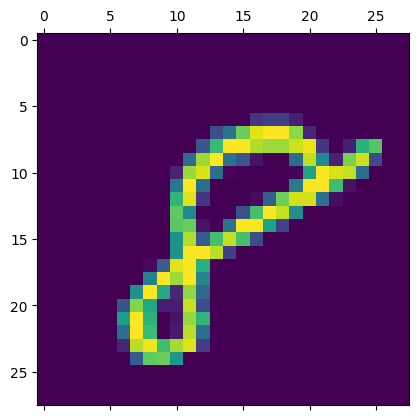

In [8]:
plt.matshow(X_train[59999])

In [9]:
y_train[59999]

np.uint8(8)

Normalize from int to float for efficiency

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

One-hot encodes the labels to make them compatible with the neural network output.
For example, label 3 becomes [0,0,0,1,0,0,0,0,0,0].

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**We will use only two layers(input and output) layer. There will be no hidden layer.**
Also out activation function is **Sigmoid**

In [12]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(10, activation='sigmoid')
])

**Now we have to compile the model**

We will use `categorical_crossentropy` as loss function because we are using for multi-class classification and one hot encoding.

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Now after compiling the model, we will have to fit with the training data**

#Change the runtime into GPU

In [14]:
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7905 - loss: 0.7820 - val_accuracy: 0.9268 - val_loss: 0.2700
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9113 - loss: 0.3242 - val_accuracy: 0.9333 - val_loss: 0.2446
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9173 - loss: 0.2932 - val_accuracy: 0.9333 - val_loss: 0.2405
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9231 - loss: 0.2751 - val_accuracy: 0.9352 - val_loss: 0.2304
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9225 - loss: 0.2788 - val_accuracy: 0.9390 - val_loss: 0.2257


In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.3023
Test Accuracy: 92.52%


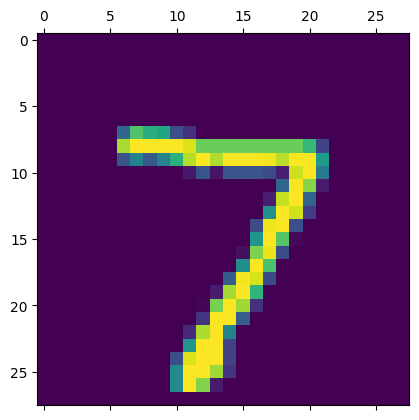

In [16]:
plt.matshow(X_test[0])

In [17]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


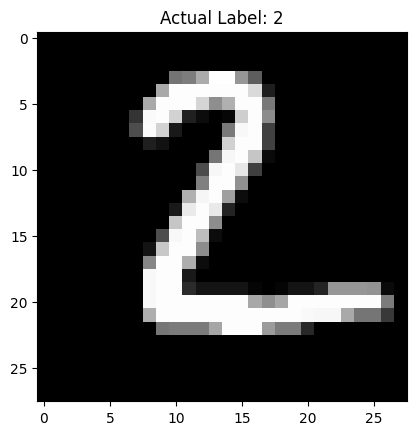

In [18]:
sample_image = X_test[1]
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {np.argmax(y_test[1])}")
plt.show()

In [19]:
prediction = model.predict(sample_image.reshape(1, 28, 28))
print("Predicted Label:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted Label: 2


#**So our model is successfully working.**

#Let's take a look on confusion matrix and visualize it

In [20]:
cmt = confusion_matrix(labels=np.argmax(y_test, axis=1), predictions=np.argmax(y_pred, axis=1))

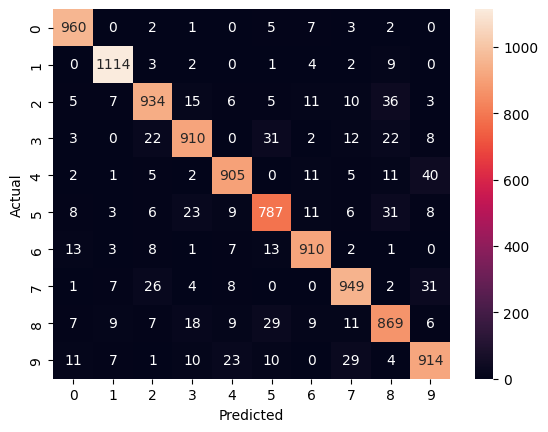

In [21]:
sns.heatmap(cmt, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Now we will upgrade the neural network for more efficient result**

In [23]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(16, activation="relu"),
    Dense(10, activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7831 - loss: 0.7252
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9310 - loss: 0.2426
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9385 - loss: 0.2108
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9463 - loss: 0.1841
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9500 - loss: 0.1679


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9410 - loss: 0.1980
Test Accuracy: 95.16%


#So we can see the accuracy has increased upto 94%.

In [25]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
cmt = confusion_matrix(labels=np.argmax(y_test, axis=1), predictions=np.argmax(y_pred, axis=1))

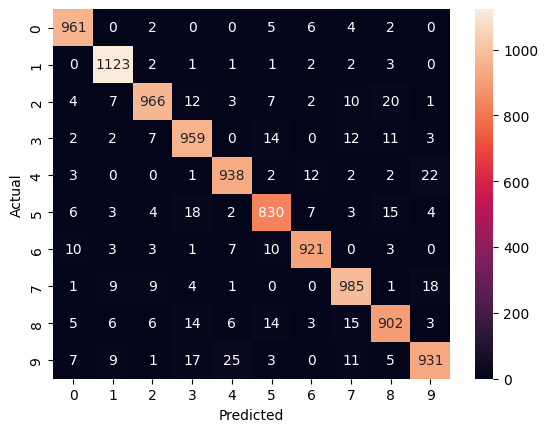

In [27]:
sns.heatmap(cmt, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#So we can see the error is less than the previous model.

#**Let's try it for more better accuracy**

In [28]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),  # Prevent overfitting

    Dense(64, activation='relu'),
    Dropout(0.3),  # Optional

    Dense(10, activation='softmax')  # Use softmax for multi-class classification
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7121 - loss: 0.9057 - val_accuracy: 0.9568 - val_loss: 0.1538
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.2676 - val_accuracy: 0.9690 - val_loss: 0.1142
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9428 - loss: 0.1997 - val_accuracy: 0.9708 - val_loss: 0.0981
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9509 - loss: 0.1676 - val_accuracy: 0.9738 - val_loss: 0.0832
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9580 - loss: 0.1425 - val_accuracy: 0.9752 - val_loss: 0.0816
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1332 - val_accuracy: 0.9785 - val_loss: 0.0744
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9644 - loss: 0.1204 - val_accuracy: 0.9753 - val_loss: 0.0777
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1138 - val_accuracy: 0.

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0937
Test Accuracy: 97.72%


#Why this model is improved:
- Larger layers with more neurons(128 and 64 in the hidden layer)
- `Dropout(0.3)` randomly disables 30% of neurons during training to prevent overfitting
- `Softmax` in the output layer works better as it is multiclass classification.
- `epochs=10 and batch_size=128` works better during training so that model can learn well.
- `validation_split=0.1` keeps 10% of data aside for validation.